In [100]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [101]:

dataset = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', split='train',shuffle_files=True)

In [102]:
dataset = tfds.as_dataframe(dataset)
dataset.head()

2023-06-14 15:12:58.818482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-06-14 15:12:58.819811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'20980074',0,b'US',b'Mobile_Electronics',b'B00D1847NE',b'274617424',b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'2015-01-09',b'One Star',b'R1OVS0D6SEXPW7',1,0,0,1
1,b'779273',0,b'US',b'Mobile_Electronics',b'B00KMO6DYG',b'397452138',b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'2015-08-06',b'Great kit',b'R9VSD0ET8FERB',4,0,0,1
2,b'15410531',0,b'US',b'Mobile_Electronics',b'B000GWLL0K',b'948304826',b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'2007-03-15',b'A/C Charger for Creative Zen Vision M',b'R3ISXCZHWLJLBH',5,0,0,1
3,b'27389005',0,b'US',b'Mobile_Electronics',b'B008L3JE6Y',b'466340015',b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'2013-07-30',b'camera stand',b'R1TWVUDOFJSQAW',5,0,0,1
4,b'2663569',0,b'US',b'Mobile_Electronics',b'B00GHZS4SC',b'350592810',b'HDE Multifunctional Bluetooth FM Audio Car K...,"b""it works but it has really bad sound quality...",b'2014-12-31',b'bad sound quality',b'R2PEOEUR1LP0GH',3,0,0,1


In [103]:
# We are not interested in all the columns in the data. So we'll pick relevant columns of interest
columns_of_interest = ['data/review_body', 'data/star_rating']
data = dataset[columns_of_interest]
data.head()

,data/review_body,data/star_rating
0,b'Does not work',1
1,b'This is a great wiring kit i used it to set ...,4
2,b'It works great so much faster than USB charg...,5
3,b'This product was purchased to hold a monitor...,5
4,"b""it works but it has really bad sound quality...",3


In [104]:
# Getting the number of columns
print("Totla number of datapoints are:", data.shape[0])

Totla number of datapoints are: 104975


In [105]:
# Getting the number of classes
print("Total number of classes are:\n", data['data/star_rating'].nunique())

Total number of classes are:
 5


In [106]:
#Getting the number of samples per class
print("Total number of samples per class are:\n", data['data/star_rating'].value_counts())

Total number of samples per class are:
 data/star_rating
5    52255
4    18088
1    17587
3     9734
2     7311
Name: count, dtype: int64


In [107]:
# Getting the average number of words per sample
print("Distribution of number of words per sample is:")
pd.DataFrame([len(s) for s in data['data/review_body']]).value_counts()

Distribution of number of words per sample is:


9        550
114      534
115      523
113      522
119      518
        ... 
2724       1
2729       1
2731       1
2732       1
16009      1
Name: count, Length: 3079, dtype: int64

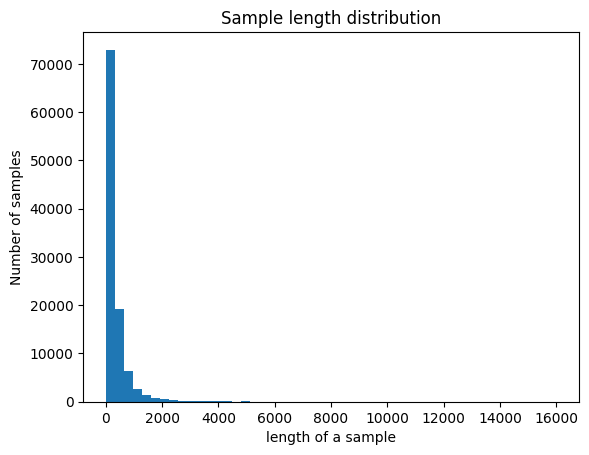

In [108]:
# Ploting distribution of sample length
def plot_sample_length_distribution(sample_texts):
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel("length of a sample")
    plt.ylabel("Number of samples")
    plt.title("Sample length distribution")
    plt.show()

plot_sample_length_distribution(data['data/review_body'].tolist())


In [109]:
# Taking a sample of 30% of the dataset for the purpose of demonstration
data = data.sample(frac=0.3, random_state=42)
data.head()

,data/review_body,data/star_rating
87666,"b""The motor spins and is not stationary. That ...",3
47509,b'Fake',1
69877,"b""Even though there are finally some silicone ...",5
11951,"b""Absolutely Wonderful: This product is every...",5
73562,"b""Love this Bluetooth speaker...easy setup, wo...",5


In [110]:
print("Number of datapoints after sampling", data.shape)

Number of datapoints after sampling (31492, 2)


In [111]:
# Converting star-rating to sentiments
data['sentiment']=data['data/star_rating'].apply(lambda rating: "Positive" if rating >=3 else "Negative")
data.head()

,data/review_body,data/star_rating,sentiment
87666,"b""The motor spins and is not stationary. That ...",3,Positive
47509,b'Fake',1,Negative
69877,"b""Even though there are finally some silicone ...",5,Positive
11951,"b""Absolutely Wonderful: This product is every...",5,Positive
73562,"b""Love this Bluetooth speaker...easy setup, wo...",5,Positive


In [112]:
# One-hot encoding the target label
data['sentiment']= data['sentiment'].map({'Positive':1, 'Negative':0})
# Dropping the rating column
data.drop(columns =["data/star_rating"], inplace =True)
data.head()

,data/review_body,sentiment
87666,"b""The motor spins and is not stationary. That ...",1
47509,b'Fake',0
69877,"b""Even though there are finally some silicone ...",1
11951,"b""Absolutely Wonderful: This product is every...",1
73562,"b""Love this Bluetooth speaker...easy setup, wo...",1


In [113]:
data.rename(columns={'data/review_body': 'review'}, inplace=True)
data['review']= data['review'].str.decode('utf-8')
data['review'] = data['review'].apply(str.lower)
data['review']
data.head()

,review,sentiment
87666,the motor spins and is not stationary. that se...,1
47509,fake,0
69877,even though there are finally some silicone ca...,1
11951,absolutely wonderful: this product is everyth...,1
73562,"love this bluetooth speaker...easy setup, wond...",1


In [114]:
#Check samples per class
data['sentiment'].value_counts()

sentiment
1    24067
0     7425
Name: count, dtype: int64

In [115]:
#Balancing the classes for the purpose of demonstration
Positive = data[data['sentiment']==1].sample(n=7425)
Negative = data[data['sentiment']==0]
train_data = pd.concat([Positive, Negative]).sample(frac=1).reset_index(drop=True)
train_data.head()
train_data['sentiment'].value_counts()

sentiment
1    7425
0    7425
Name: count, dtype: int64

In [74]:
train_data.head()

,data/review_body,sentiment
0,"b""When this device does record the quality is ...",0
1,"b""This was a really cute armband for my ipod t...",0
2,"b""it's working ok. easy instalationn & it is ...",1
3,"b""I checked out other more expensive cases but...",1
4,"b""If BTY is trying to sell these as 1350mAh ba...",0


In [117]:
# Sampling reviews and their corresponding labels
reviews = train_data['review'].tolist()
labels = train_data['sentiment'].tolist()
print("Sample reviews:")
print(reviews[10:16])
print("Corresponding labels:")
print(labels[10:16])

Sample reviews:
["i like the size and buttons are easy to find without looking. can put in arm rest or pocket feels good in had. only thing is all the buttons do not work. i still find myself using the screen because the is no fuction button or the button won't do function. i would still buy again it's worth having.", '2 cables did not work right onthe get go. the last one worked but iphone said was not compatable. poor', 'product looks great, but functionality is aweful! i had perfect reception with my oem antennae, and had sub par reception with this product. not worth the money. i would suggest not purchasing this product.', "the advertisemnt states you can speak up to a 16 mile range but that's not completely true.  once you receive the product and read the fine print on the back of the packaging insert, which people usually throw away, you will see a chart that states:  up to 16 miles, mountain to valley; up to 5 miles, lake area and up to 1 mile urban area.  i'm in an urban area 

In [123]:
# Split the data into train, test and validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)


In [125]:
# Length of training and test data
print("Number of training data points are:", len(X_train))
print("Number od training labels are :", len(y_train))
print("Number of test data points are:", len(X_test))
print("Number of test labels are:", len(y_test))

Number of training data points are: 11880
Number od training labels are : 11880
Number of test data points are: 2970
Number of test labels are: 2970


In [127]:
# Loading the tokenizer
from transformers import DistilBertTokenizerFast
Model_Name = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = DistilBertTokenizerFast.from_pretrained(Model_Name)


In [128]:
#Sample tokenizer
print("sentence:", X_train[1])
tokenizer(X_train[1], truncation=True, padding=True, max_length=256, return_tensors='tf')

sentence: i bought this for recording music from an antique phonograph onto my macbook pro running os x 10.4.  i had previously tried using an unpowered microphone plugged into the audio input jack, but that setup produced buzzing and poor sensitivity.<br /><br />this new usb microphone worked great.  i didn't have to install any software, just plugged it in and selected it in the sound preferences.  the sound quality is very clear and sensitive.


{'input_ids': <tf.Tensor: shape=(1, 99), dtype=int32, numpy=
array([[  101,  1045,  4149,  2023,  2005,  3405,  2189,  2013,  2019,
        14361,  6887, 17175, 14413,  3031,  2026,  6097,  8654,  4013,
         2770,  9808,  1060,  2184,  1012,  1018,  1012,  1045,  2018,
         3130,  2699,  2478,  2019,  4895, 27267, 15545, 13354,  5999,
         2046,  1996,  5746,  7953,  2990,  1010,  2021,  2008, 16437,
         2550, 20386,  1998,  3532, 14639,  1012,  1026,  7987,  1013,
         1028,  1026,  7987,  1013,  1028,  2023,  2047, 18833, 15545,
         2499,  2307,  1012,  1045,  2134,  1005,  1056,  2031,  2000,
        16500,  2151,  4007,  1010,  2074, 13354,  5999,  2009,  1999,
         1998,  3479,  2009,  1999,  1996,  2614, 18394,  1012,  1996,
         2614,  3737,  2003,  2200,  3154,  1998,  7591,  1012,   102]],
      dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 99), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [134]:
#Performing tokenization
Max_length =256
train_encodings = tokenizer(X_train, truncation =True,padding =True,max_length = Max_length, return_tensors = 'tf')
test_encodings = tokenizer(X_test,truncation = True, padding = True, max_length= Max_length, return_tensors= 'tf')

In [139]:
# Now we convert tokenizer to TF object

import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test))

In [140]:
# now, we will define the model.
from transformers import TFDistilBertForSequenceClassification
model = TFDistilBertForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path = Model_Name,
    num_labels =2)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [142]:
# Specify the model optimizer
optimizers = tf.optimizers.Adam(
    learning_rate=5e-5)

In [143]:
# Specify the loss function
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [144]:
# Compiling the model
model.compile(optimizer=optimizers, loss=loss_func, metrics=['accuracy'])

In [146]:
# Inspect the model
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [149]:
# Defining hyperparameters
Batch_size =16
num_epochs =2

# Training the model
model.fit(train_dataset.shuffle(len(X_train)).batch(Batch_size),
          epochs=num_epochs,
          batch_size=Batch_size,
          validation_data=test_dataset.shuffle(len(X_test)).batch(Batch_size)
          )

Epoch 1/2


2023-06-14 16:40:50.294389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [11880,256]
	 [[{{node Placeholder/_1}}]]
2023-06-14 16:40:50.294956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [11880,256]
	 [[{{node Placeholder/_1}}]]


743/743 [==============================] - ETA: 0s - loss: 0.2774 - accuracy: 0.8868

2023-06-14 18:32:49.062057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [2970,256]
	 [[{{node Placeholder/_1}}]]
2023-06-14 18:32:49.062590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int32 and shape [2970]
	 [[{{node Placeholder/_2}}]]


743/743 [==============================] - 7221s 10s/step - loss: 0.2774 - accuracy: 0.8868 - val_loss: 0.2347 - val_accuracy: 0.9010
Epoch 2/2
743/743 [==============================] - 6461s 9s/step - loss: 0.1650 - accuracy: 0.9396 - val_loss: 0.2598 - val_accuracy: 0.9020


In [150]:
# Saving the model
model.save_pretrained("/tmp/sentiment_model")

In [152]:
#Preprocessing the unseen data
unseen_data=data.sample(frac=0.5, random_state=42)
unseen_review = unseen_data['review'].tolist()

unseen_encodings = tokenizer(unseen_review,
                             padding=True,
                             truncation=True,
                             max_length=Max_length,
                             return_tensors='tf')

y_unseen = unseen_data['sentiment'].tolist()
unseen_encodings = tf.data.Dataset.from_tensor_slices((dict(unseen_encodings),
                                                       y_unseen))

In [153]:
# Evaluating the model
model.evaluate(unseen_encodings.shuffle(len(unseen_review)).batch(Batch_size),
               return_dict=True,
               batch_size=Batch_size)

2023-06-14 20:40:50.692413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [15746,256]
	 [[{{node Placeholder/_1}}]]
2023-06-14 20:40:50.693369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [15746,256]
	 [[{{node Placeholder/_1}}]]


985/985 [==============================] - 11005s 11s/step - loss: 0.2162 - accuracy: 0.9218


{'loss': 0.21618497371673584, 'accuracy': 0.9218214154243469}

In [5]:
import gradio as gr
def predict (sentence):
    # Loading the model
    loaded_model = TFDistilBertForSequenceClassification.from_pretrained("/tmp/sentiment_model")

    # Getting the prediction
    predict_input = tokenizer.encode(sentence,
                                     truncation =True,
                                     padding= True,
                                     return_tensors='tf')
    tf_output = loaded_model.predicted(predict_input)[0]
    tf.prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]
    return ['negative', 'positive'][np.argmax(tf.prediction)]
demo = gr.Interface(fn = predict, inputs = 'text', outputs = 'text', live = True)

demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://4dd04bae5029416618.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
